# 4. Motion and physics beyond 1D

We next turn to the motion and physics in two and three dimensions. We always start with Newton's 2nd law:

$$ \vec{F}(r) = m \ddot{\vec{r}} $$

(Important side note: Newton's law should really be written as:

$$ \ddot{\vec{r}} = \frac{\vec{F}(r)}{m} $$

as this makes it much clearer what it tells us: **how the body responds to a force applied to it -- by attaining acceleration equal to the force applied divided by the body's mass**. Writing $ \vec{F}(r) = m \ddot{\vec{r}} $ makes it seem as if the body's acceleration generates the force, when conceptually it's the other way around!)

Now let's figure out now to compute the trajectory (position as a function of time) from this. Let's begin by representing the position of the body in [Cartesian coordinates](https://en.wikipedia.org/wiki/Cartesian_coordinate_system):

$$ \vec{r} = x \cdot \vec{i} + y \cdot \vec{j} + z \cdot \vec{z}$$

The velocity is the derivative w.r.t. time. Applying the chain rule:

$$ \dot{\vec{r}} = \frac{d}{dt}\left(x \cdot \vec{i} + y \cdot \vec{j} + z \cdot \vec{z} \right) \\
   \dot{\vec{r}} = \frac{d}{dt}\left(x \cdot \vec{i}\right) + 
   \frac{d}{dt}\left(y \cdot \vec{j}\right) + 
   \frac{d}{dt}\left(z \cdot \vec{z}\right) \\
   \dot{\vec{r}} = \left(\dot x \cdot \vec{i} + x \cdot \dot{\vec{i}}\right) + 
   \left(\dot y \cdot \vec{j} + y \cdot \dot{\vec{j}}\right) + 
   \left(\dot z \cdot \vec{k} + z \cdot \dot{\vec{k}}\right) \\
   \dot{\vec{r}} = \dot x \cdot \vec{i} + \dot y \cdot \vec{j} + \dot z \cdot \vec{k}
$$

How do we go from the third to the fourth equation? The basis vectors in Cartesian basis are fixed, not a function of position, and therefore their time derivative is zero. **This is not a universal property of all coordinate systems** -- in fact, we'll later see that for polar and spherical coordinate systems the derivatives of basis vectors are not zero.

We repeat this procedure to obtain the second derivative:

$$ \ddot{\vec{r}} = \ddot x \cdot \vec{i} + \ddot y \cdot \vec{j} + \ddot z \cdot \vec{k} $$

So Newton's 2nd law, written in a [Cartesian coordinate system](https://en.wikipedia.org/wiki/Cartesian_coordinate_system), is then:

$$ \ddot x \cdot \vec{i} + \ddot y \cdot \vec{j} + \ddot z \cdot \vec{k} = \frac{1}{m}\left(F_x \vec{i} + F_x \vec{j} + F_x \vec{k}\right) $$

This equation holds only if the parts multiplying each basis vector hold individually. We therefore have three scalar equations:

$$ \ddot x = \frac{F_x}{m} $$

$$ \ddot y = \frac{F_y}{m} $$

$$ \ddot z = \frac{F_z}{m} $$

Solving these three equations will give us the time evolution of vector components $x$, $y$, $z$, and therefore the motion of the object in three dimensions.

## Examples in two dimensions

Let's start with some examples in 2D, for simplicity. A classic problem is one of a body moving on the surface of the Earth (e.g., a falling rock, or a ball being thrown). Such a body feels no force in the horizontal direction, and experences the acceleration of gravity in the vertical direction:

$$ m \ddot x = 0 $$

$$ m \ddot y = -m g $$

How do we solve this? First turn this system of two 2nd-order differential equations into four first-order differential equations (just like we did with the harmonic oscillator previously):

$$ \dot x = v_x $$

$$ \dot v_x = 0 $$

$$ \dot y = v_y $$

$$ \dot v_y = -g $$

And now, we write some code that *numerically integrates* this system of equations using the [Euler's method](https://en.wikipedia.org/wiki/Euler_method):

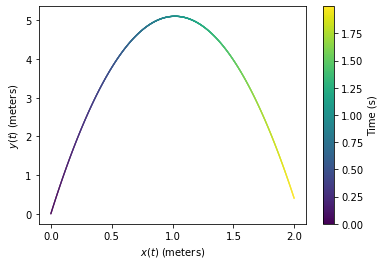

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def x_dot(x, y, vx, vy, t):
    return vx

def vx_dot(x, y, vx, vy, t):
    return 0

def y_dot(x, y, vx, vy, t):
    return vy

def vy_dot(x, y, vx, vy, t):
    return -g

def integrate(x_dot, vx_dot, y_dot, vy_dot, tbegin, tend, x0, vx0, y0, vy0, dt):
    # set up initial conditions
    t = tbegin
    x, vx = x0, vx0
    y, vy = y0, vy0

    xval, vxval = [], []
    yval, vyval = [], []
    tval = []
    while t < tend - dt/2.:  # why did I do this? Ask me about numerical (im)precision...!
        tval.append(t)
        xval.append(x)
        vxval.append(vx)
        yval.append(y)
        vyval.append(vy)

        xnew  =  x +  x_dot(x, y, vx, vy, t) * dt
        vxnew = vx + vx_dot(x, y, vx, vy, t) * dt
        ynew  =  y +  y_dot(x, y, vx, vy, t) * dt
        vynew = vy + vy_dot(x, y, vx, vy, t) * dt
        
        x, vx = xnew, vxnew
        y, vy = ynew, vynew
        t = t + dt

    return (tval, xval, vxval, yval, vyval)

g = 9.81  # gravitational acceleration at the surface of the Earth, in meters / second

tbegin, tend = 0, 2
x0, vx0 = 0, 1
y0, vy0 = 0, 10
dt = 0.001

(tval, xval, vxval, yval, vyval) = integrate(x_dot, vx_dot, y_dot, vy_dot, tbegin, tend, x0, vx0, y0, vy0, dt)

plt.scatter(xval, yval, c=tval, s=0.1)
plt.xlabel("$x(t)$ (meters)")
plt.ylabel("$y(t)$ (meters)")
plt.colorbar(label="Time (s)");

## Now do the analytic version, and compare

This is a system that's also possible to solve analytically, by simple integration. Let's do that (and then compare the solutions). I'll rewrite the four equations, but in the order in which we'll integrate them:

$$ \dot v_x = 0 $$

$$ \dot x = v_x $$

$$ \dot v_y = -g $$

$$ \dot y = v_y $$

Integrate the first equation from $t=0$ to $t=T$. We do this by multiplying both sides by $dt$ and adding the $\int$ symbol (i.e. "integrating"). Here it is step by step:

$$ \dot v_x = 0 $$

Let's rewrite it so we explicitly show the differentials:

$$ \frac{dv_x}{dt} = 0 $$

And then multiply by $dt$ and integrate from $t=0$ to $t=T$:

$$ \int_{t=0}^{t=T} \frac{dv_x}{dt} \cdot dt = \int_{t=0}^{t=T} 0 \cdot dt $$

(where $T$ is some unspecified time in the future). Now comes the interesting part:

$$ \int_{v_x=v_x(t=0)}^{v_x=v_x(t=T)} dv_x = 0 \cdot \int_{t=0}^{t=T} dt $$

On the left-hand side, $dt$ cancels out, leaving $v_x$ to be the new variable of integration (as the remaining differential is $dv_x$). This also has the effect of **changing the variable that specifies the bounds of integration**: instead of integrating from $t=0$, now we must integrate from the value of $v_x$ as it was when $t=0$ -- i.e., $v_x(t=0)$, which we can write $v_x(0)$. Similarly, the upper bound will be the value of velocity when $t=T$, that is $v_x(t=T)$ -- or, to save some typing, $v_x(T)$.

Things stay the same on the left-hand side, but as we have that entire integral multiplied by zero, we know it will be zero. That leaves us with:

$$ \int_{v_x(0)}^{v_x(T)} dv_x = 0 $$

We solve the [definite integral](https://www.mathsisfun.com/calculus/integration-definite.html) on the right-hand side. The solution is a function which, when differentiated, returns $1$ -- that's just $v_x$. But since it's a [definite integral](https://www.mathsisfun.com/calculus/integration-definite.html), we need to evaluate it at its bounds:

$$ \left[ v_x \right]_{v_x(0)}^{v_x(T)} = 0 $$

That gives us:

$$ v_x(T) - v_x(0) = 0 $$

or:

$$ v_x(T) = v_x(0) $$

In other words, absent acceleration (which what the equation $\dot v_x = 0$ means), the velocity at any time $t=T$ will be the same as at $t=0$ -- constant. Finally, now that we've done away with the integrals and there's no possibility of confusion, let's rename $T$ back to $t$. Also, let's use the shorthand $v_{x0} = v_x(0)$, giving us the result:

$$ v_x(t) = v_{x0} $$

While this may seem a painfully dragged out process to reach an obvious solution, it's good to walk through it carefully at least once, as you will need all these steps for all but the simplest if integrals.

Let's move on. Now we can solve the second equation:

$$ \dot x = v_x(t) = v_{x0} $$

where the second equality comes from plugging in the solution of the equation we just solved (that's why we did this one first).

Now we use the exact same technique:

$$ \frac{dx}{dt} = v_{x0} $$

And then multiply by $dt$ and integrate from $t=0$ to $t=T$, switching the variable of integration to $x$ on the left-hand side:

$$ \int_{x=x(0)}^{x=x(T)} dx = v_{x0} \int_{t=0}^{t=T} dt $$

Note: we usually omit the variable name in the bounds of integration, as it's clear which variable it is by looking at the differential (e.g. $dx$ and $dt$). So this is how a physicist would usually write the above:

$$ \int_{x_0}^{x(T)} dx = v_{x0} \int_{0}^{T} dt $$

where I've used the shorthans $x_0 \equiv x(0)$. We again solve the [definite integrals](https://www.mathsisfun.com/calculus/integration-definite.html) on both sides, giving us:

$$ \left[ x \right]_{x_0}^{x(T)} = v_{x0} \cdot \left[ t \right]_{0}^{T} $$

or after evaluating, rearranging, and renaming $T$ to $t$ gives us the familiar solution:

$$ x(t) = x_0 + v_{x0} \cdot t $$

. In other words, the x position of the body experiencing no acceleration will be equal to its starting position $x_0$ plus its x-velocity times the time it moved, $t$.

Now for the remaining two (and more interesting) equations:

$$ \dot v_y = -g $$

$$ \dot y = v_y $$

Let's deal with the first one:

$$ \int_{v_{y0}}^{v_y(T)} dv_y = \int_{0}^{T} (-g) \cdot dt $$

$$ v_y(T) = v_{y0} - g \cdot T $$

and after renaming $T$ to $t$:

$$ v_y(t) = v_{y0} - g \cdot t $$

In words, the velocity in the y direction is equal to the starting velocity plus the velocity accumulated due to constant acceleration over time $t$. We can now plug this into the remaining equation:

$$ \dot y = v_y = v_{y0} - g \cdot t $$

and integrate again:

$$ \int_{y_0}^{y(T)} dy  = \left[ y \right]_{y_0}^{y(T)}
                         = \int_{0}^{T} \left( v_{y0} - g \cdot t \right) dt 
                         = \left[ v_{y0} t - g \cdot \frac{t^2}{2} \right]_{0}^{T} $$

after evaluating at the bounds, renaming $T$ to $t$, and rearranging, we get the familiar:

$$ y(t) = y_0 + v_{y0} \cdot t - \frac{g}{2} \cdot t^2 $$

i.e., the parabolic vertical free-fall motion.

Collecting the two trajectory equations together, here's our analytic solution:

$$ x(t) = x_0 + v_{x0} \cdot t $$

$$ y(t) = y_0 + v_{y0} \cdot t - \frac{g}{2} \cdot t^2 $$

Now let's compare it with the numerically computed one:

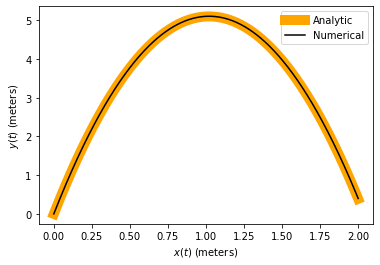

In [2]:
g = 9.81  # gravitational acceleration at the surface of the Earth, in meters / second

tbegin, tend = 0, 2
x0, vx0 = 0, 1
y0, vy0 = 0, 10
dt = 0.001

# numerical solution
(tval, xval, vxval, yval, vyval) = integrate(x_dot, vx_dot, y_dot, vy_dot, tbegin, tend, x0, vx0, y0, vy0, dt)
tval = np.asarray(tval)

# analytic solution
xval_analytic = x0 + vx0 * tval
yval_analytic = y0 + vy0 * tval - g/2* tval**2

plt.plot(xval_analytic, yval_analytic, c='orange', linewidth=10, label='Analytic')
plt.plot(xval, yval, c='black', label='Numerical')
plt.xlabel("$x(t)$ (meters)")
plt.ylabel("$y(t)$ (meters)")
plt.legend();

And there it is!

Exercises:
1. Fiddle with the intial conditions to convince yourself that our numerical solution closely follows the analytic solution in every case.
2. But then change the `dt` -- the timestep -- and see what happens when you make it larger (e.g. try `dt = 0.1`). No free lunch...

A few things for you to observe here:
* Note how easy it was to numerically solve these equations -- we were up and running in minutes. Relative to solving the integral(s) analytically, it involved a lot less knowledge/thinking. But...
* ... also note how ***expensive*** it was to get to an (approximate) solution. For example, to get the value of $(x, y)$ at time $t=2$s numerically, using $dt=0.001$ timestep our code had to run the `while` loop about `2000` times. And at each iteration of the loop, it computed four new values, each one requiring an addition and a multiplication (two mathematical operations). This gives us a total of $2000 \cdot 4 \cdot 2 = 16,000$ mathematical operations (and I'm not even including the math needed to advance $t$ in the loop, etc.). Compare that to how many mathematical operations we need with an analytic solution: a grand total of $7$. I.e., our analytic solution **is over $2,000$ times faster** than then numerical one (and it's exact!).

Bottom line: if you can do it analytically, you should (unless your problem is *very* simple).

## Ballistic trajectories

All that said, the undisputed advantage of numerical solutions is that a) they're *incredibly* easy to execute (if you have enough computational power), and b) that sometime there's no choice, as there's no analytic solution.

Here's an example of both of those: computing the [trajectory of a projectile](https://en.wikipedia.org/wiki/Projectile_motion) under the influence of [drag](https://en.wikipedia.org/wiki/Projectile_motion#Trajectory_of_a_projectile_with_air_resistance).

Atmospheric drag acts in the direction opposite of the velocity of a body, and with a magnitude proportional to the _square_ of the speed (these are both experimental facts). Expressed mathematically:

$$ \vec{F_{\mathrm {air} }}= - \gamma v^{2}\cdot\hat{v} $$

The constant $\gamma$ captures both the resistance of the fluid (e.g., it's easy to see how it must be higher for water than for air), but also the shape of the object (it's also easy to imagine how it must be smaller for an arrow-shaped object rathr than something spherical). It acts in the direction opposite of the velocity of the body, which is why the vector $\hat{v}$ is involved. If the velocity is nonzero in both $x$ and $y$ direction, the drag force will act both in the $x$ and $y$ direction (it's effect is always to try to slow the body down).

This force has to be added to the force of gravity in our differential equations of motion:

$$ \ddot{\vec{r}} = \frac{1}{m} \left( \vec{F}_{\mathrm{gravity}} + \vec{F}_{\mathrm{air} } \right) $$

and when we expand this into the four equations for position and velocity in two dimensions, we get:

$$ \dot x = v_x $$

$$ \dot v_x = -\gamma \cdot v^2 \cdot \frac{v_x}{v} = -\gamma \cdot {v_x}\sqrt{v_x^2 + v_y^2} $$

$$ \dot y = v_y $$

$$ \dot v_y = -g -\gamma \cdot v^2 \cdot \frac{v_y}{v} = -g -\gamma \cdot {v_y}\sqrt{v_x^2 + v_y^2} $$

The equation for $v_x$ and $v_y$ are more complicated now. The $-\gamma \cdot v^2$ term comes from the magnitude of the drag force that's proportional to velocity. The $\frac{v_x}{v}$ term (or $\frac{v_y}{v}$ for $\dot v_y$) is the cosine (or sine) of the velocity vector -- it gives us the part of the force acting in the $x$ (or $y$) direction (it's the component of $\hat{v}$).

But, most importantly, the $v_x$ and $v_y$ equations are now _coupled_ -- to compute $\dot v_x$, you need to also have the value of $v_y$. I.e., what happens in the $x$ direction now also depends on what's happening in the $y$ direction (and vice versa). This was not the case in the first example (and that made the first example possible to solve analytically).

Let's put this into code, and see what ballistic trajectories look like:

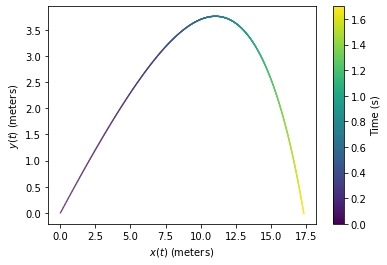

In [3]:
def x_dot(x, y, vx, vy, t):
    return vx

def vx_dot(x, y, vx, vy, t):
    v = np.sqrt(vx**2 + vy**2)
    a_drag = -gamma*v**2
    return a_drag * vx/v

def y_dot(x, y, vx, vy, t):
    return vy

def vy_dot(x, y, vx, vy, t):
    v = np.sqrt(vx**2 + vy**2)
    a_drag = -gamma*v**2

    return -g + a_drag * vy/v

g = 9.81
gamma = 0.1
tbegin, tend = 0, 1.7
x0, vx0 = 0, 30
y0, vy0 = 0, 15
dt = 0.001

(tval, xval, vxval, yval, vyval) = integrate(x_dot, vx_dot, y_dot, vy_dot, tbegin, tend, x0, vx0, y0, vy0, dt)

plt.scatter(xval, yval, c=tval, s=0.1)
plt.xlabel("$x(t)$ (meters)")
plt.ylabel("$y(t)$ (meters)")
plt.colorbar(label="Time (s)");

It's easy to see how different this trajectory is from a typical parabola -- the projectile slows down and then drops more vertically that in the case with no drag.

Exercises:
1. Play with increasing/decreasing the drag and see if what happens matches your intuition (absent any bugs, it should!). You'll also notice that (depending on your choices of initial conditions) the projectile will end up with $y < 0$ at final time. This is because our model doesn't know there's a floor -- the ground -- into which the projectile would smash.
1. Add code to the `integrate` function to stop the `while` loop as soon as $y < 0$; i.e., after the projectile hits the ground.
1. Add the code to "underplot" the analytic solution for a trajectory w/o drag (like we did in the example w/o drag).
1. Finally, confirm that setting $\gamma=0$ reproduces the analytic drag-free solution.

## Launching a projectile around the Earth

The model of how the projectile behaves that we've done above is *approximate*. We know the Earth is not flat (well... most of us do...). The real force of gravity is given by:

$$ \vec{F} = - G \frac{M m}{r^2} \hat{r} $$

where $\vec{r}$ is the vector from the center of the Earth to our position at the surface, $M$ is the mass of the Earth, and $m$ is the mass of our body. When coupled with Newton's 2nd law, we get for the acceleration:

$$ \ddot{\vec{r}} = - G \frac{M}{r^2} \hat{r} $$

because $m$ appears on both sides of $F = ma$ equation, and therefore cancels out. (sidenote: this is actually _incredibly profound_. Gravity if the only force where mass enters on both sides of the equation -- and is what's led to Einstein's General theory of Relativity and the understanding of gravity as curvature of spacetime... but that's another story).

Where does the $g = -9.81 m/s^2$ come from? Let's calculate the value of $\ddot{r}$ at $r = R_\mathrm{Earth} = 6,371\mathrm{km}$:

$$ \ddot{r} = - 6.67\cdot10^{-11} \frac{5.972\cdot10^{24}}{6371000^2} = -9.81{\mathrm m/s}$$

The idea that gravity acts "down" by imparting $g = 9.81 m/s^2$ acceleration is an approximation valid around the Earth's surface. It's valid only if we don't move too much either in the vertical direction (as the value will start to change), but also in the horizontal direction -- as the surface of the Earth is curved so our $(x, y)$ coordinate system won't be aligned with the parallel/perpendicular direction.

Exercises:
1. Compute $g$ (using the equation above) to four decimal places. Then calculate what is the difference in acceleration a submarine feels in the [Challenger Deep](https://en.wikipedia.org/wiki/Challenger_Deep) vs. a climber at the top of [Mount Everest](https://en.wikipedia.org/wiki/Mount_Everest).
2. How far would one need to move horizontally on the surface of the Earth for the direction of the gravitational force (which always points to the Earth's center) to shift by $1^\circ$?

Now let's compute a correct solution of how gravity works on Earth (note: still in 2D -- we just track the perpendicular and horizondal directions). The code is below.

We begin by reproducing the first example from this notebook -- simple (drag-free) projectile trajectory. If we do everything right, we **must** get approximately the same result (as that first solution was really an approximation of how gravity on Earth really works).

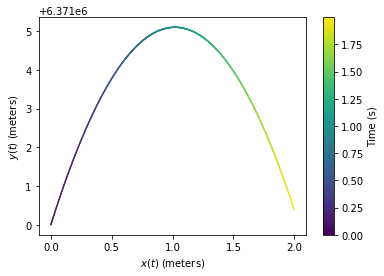

In [4]:
def x_dot(x, y, vx, vy, t):
    return vx

def vx_dot(x, y, vx, vy, t):
    r = np.sqrt(x**2 + y**2)
    a = - G*M / r**2
    return a * x/r

def y_dot(x, y, vx, vy, t):
    return vy

def vy_dot(x, y, vx, vy, t):
    r = np.sqrt(x**2 + y**2)
    a = - G*M / r**2
    return a * y/r

G = 6.67e-11 # in N kg^-2 m^2
M = 5.972e24
Re = 6_371_000

tbegin, tend = 0, 2
x0, vx0 = 0, 1
y0, vy0 = Re, 10
dt = 0.001

(tval, xval, vxval, yval, vyval) = integrate(x_dot, vx_dot, y_dot, vy_dot, tbegin, tend, x0, vx0, y0, vy0, dt)

plt.scatter(xval, yval, c=tval, s=0.1)
plt.xlabel("$x(t)$ (meters)")
plt.ylabel("$y(t)$ (meters)")
plt.colorbar(label="Time (s)");

Compare it to the plots close to the top of the notebook and verify they're the same. The only difference is that the origin of the $y$ axis here is now at the center of the Earth, so our projectile was launched from $y_0 = 6371\mathrm{km}$, rather than $y=0$ as we had it initially.

Before moving on to the next step, let's rework the code a bit. I'll add a few lines that plot the surface of the Earth, and I'll also package everything up into one function that takes just `(vx0, vy0)` as arguments.

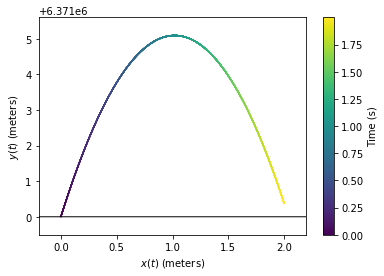

In [5]:
def launch(vx0 = 1, vy0 = 10, T=2, nsteps=10000, aspect='auto', xrange=None, yrange=None, plot_earth=True):
    G = 6.67e-11 # in N kg^-2 m^2
    M = 5.972e24
    Re = 6_371_000

    tbegin, tend = 0, T
    x0, vx0 = 0, vx0
    y0, vy0 = Re, vy0
    dt = T/nsteps

    (tval, xval, vxval, yval, vyval) = integrate(x_dot, vx_dot, y_dot, vy_dot, tbegin, tend, x0, vx0, y0, vy0, dt)

    phi = np.linspace(0, 2*np.pi, 100_000)
    ground_x, ground_y = Re*np.cos(phi), Re*np.sin(phi)

    if plot_earth:
        plt.plot(ground_x, ground_y, c='black', linewidth=1)
    plt.scatter(xval, yval, c=tval, s=0.1)

    # zoom in the plot around our trajectory
    if xrange is None:
        minx, maxx = min(xval), max(xval)
        lenx = maxx - minx
        xrange = (minx - lenx*0.1, maxx + lenx*0.1)
    if yrange is None:
        miny, maxy = min(yval), max(yval)
        leny = maxy - miny
        yrange = (miny - leny*0.1, maxy + leny*0.1)
    plt.xlim(*xrange)
    plt.ylim(*yrange)
    plt.gca().set_aspect(aspect)

    plt.xlabel("$x(t)$ (meters)")
    plt.ylabel("$y(t)$ (meters)")
    plt.colorbar(label="Time (s)");
    
launch(1, 10)

Now let's have some fun. Let's launch the projectile with $1\mathrm{km/s}$ ***horizontal*** speed:

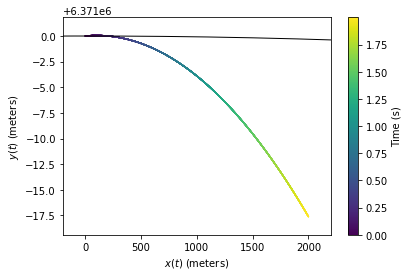

In [6]:
launch(1_000, 1)

We see it's moved a lot in the two seconds of flight (2km, unsurprisingly), but the pull of gravity is ruthless -- it was pulled to approximately -17.5 meters relative to the surface (i.e., it would've hit the surface quite quickly). 

However, we also begin to note the curvature of the surface at this scale -- note how the black line on top appears to end lower on the right than it was on the left? (sidenote: but also notice the extremely diffent scales on the x and y axes! The curvature is very exaggerated here, so we're able to see the plot).

What happens if we launch the projectile at an even greater speed? Let's try 4km/s?

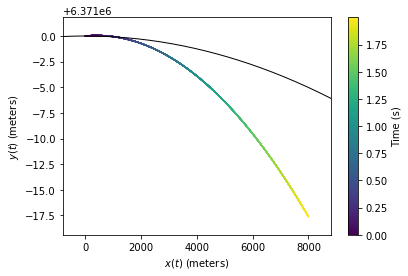

In [7]:
launch(4_000, 1)

Now the curvature is even more noticable, and it's getting closer to compensating for the fall our projectile experiences due to gravity. Interesting... Can we launch the projectile fast enough so that the Earth curves beneath if faster than it falls?

Let's try 8km/s:

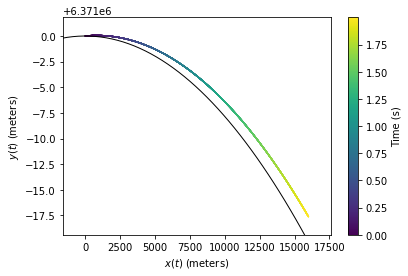

In [8]:
launch(8_000, 1)

We did it! Note how the surface of the Earth is now **below** the projectile's trajectory. From the point of view of someone standing on the surface, the projectile didn't fall -- it actually moved up in the two seconds of flight we've observed!

Let's now extend the time over which we observe this -- let's make it, say... $5000{\rm s}$:

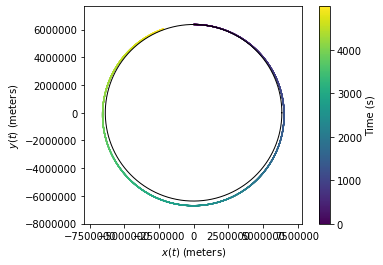

In [9]:
launch(8_000, 1, T=5_000, aspect='equal')

That's nearly a full **orbit** -- the projectile went all around the Earth.

Congratulations, we've computed our first orbit in a gravitational field!

Let's try launching it even faster:

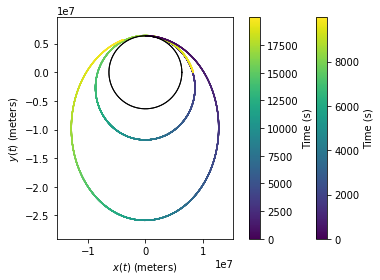

In [10]:
launch(9_000, 1, T=10_000, aspect='equal')
launch(10_000, 1, T=20_000, aspect='equal')
plt.tight_layout()

## Circular Velocity

The resulting look like [ellipses](https://en.wikipedia.org/wiki/Ellipse), with the center of the Earth being in one of the two foci of each ellipse. We don't yet have all the tools to solidly, mathematically, *prove* this, but we're getting there.

Let's see what we can do analytically. One of the things we can compute analytically is the **circular speed** -- the speed at which we'd need to launch the projectile horizontally at some distance for it to continue going in a circle around the center of the Earth. There's more than one way of computing this; we'll do it by considering the following diagram:

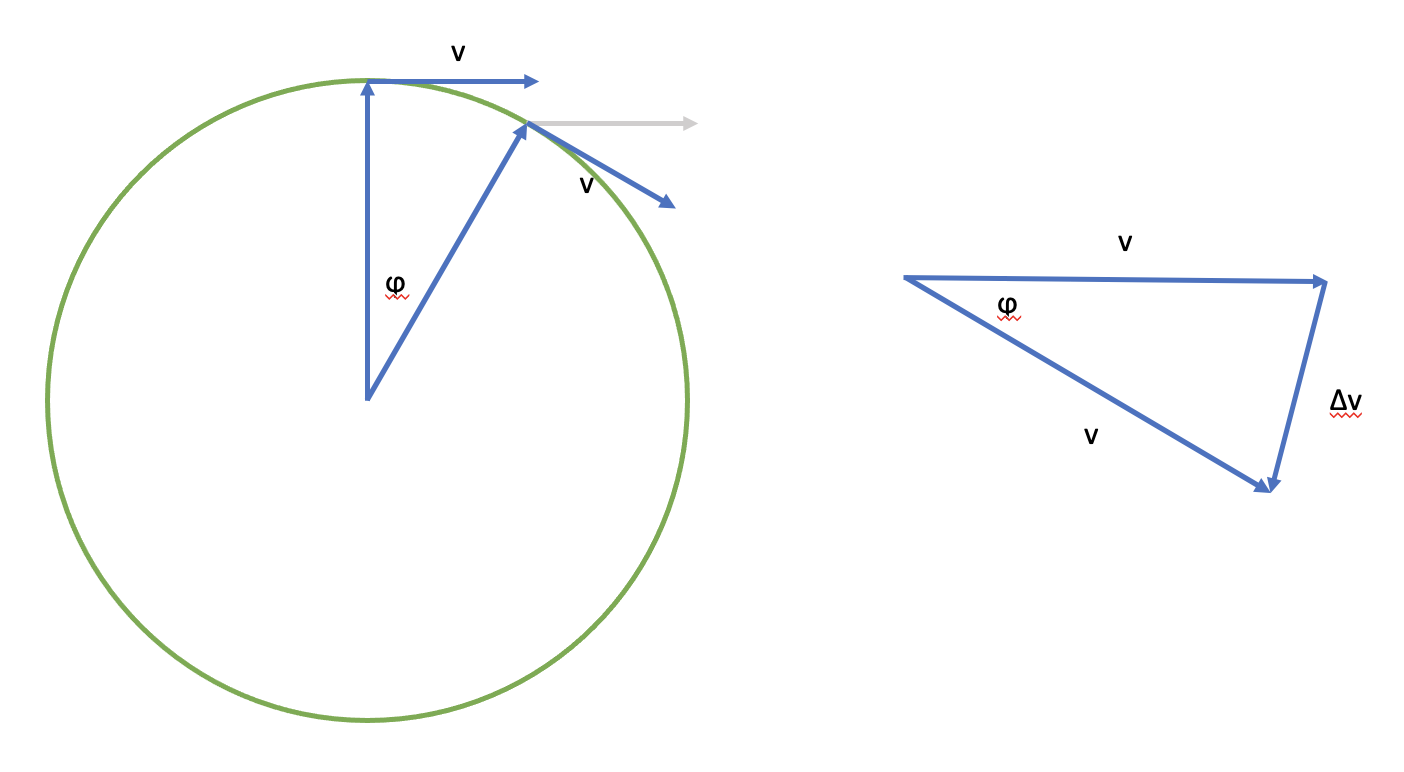

Imagine a body traveling with the exactly needed velocity, $v$. After some (short) time $\Delta t$, it will travel an arc of length $v \cdot \Delta t$. This arc also happens to be equal to $ r \cdot \phi $.

The velocity of the body traveling in a circle always has to be perpendicular to the radius. So the _direction_ of the velocity has to have changed by the same angle, $\phi$. For small angles $\phi$ the magnitude of the velocity change $\Delta v$ then has to be equal to $\Delta v = v \cdot \phi $, as seen from the triangle on the right.

We now take these equalities:

$$ \Delta v = v \cdot \phi $$
$$ v \cdot \Delta t = r \cdot \phi $$

eliminate $\phi$ (e.g., by just dividing the two equations), and move all $v$ terms to the right to obtain:

$$ \frac{\Delta v}{\Delta t} = \frac{v^2}{r} $$

Now apply our usual trick by letting $\Delta t \rightarrow 0$, to get:

$$ \frac{dv}{dt} = \dot{v} = \frac{v^2}{r} $$

or the expression for [centripetal acceleration](https://en.wikipedia.org/wiki/Centripetal_force) that a body must experience to remain on a circular orbit at some distance $r$.

For our case, this acceleration is imparted by gravity, so it must be equal to $ G \frac{M}{r^2} $, and therefore:

$$ \frac{v^2}{r} = G \frac{M}{r^2} $$

Solving for $v$, we find:

$$ v_c = \sqrt{ \frac{ G M}{r} } $$

where we've labeled this velocity as $v_c$ -- the _circular velocity_.

Let's compute it, and see if it really works:

In [11]:
vc = np.sqrt(G * M / Re)
print(vc)

7907.132456352965


Let's also compute the time it takes to make a full circle (the _orbital period_):

In [12]:
P = 2*Re*np.pi / vc
print(f"{P:.2f} seconds")

5062.54 seconds


And the moment of truth...:

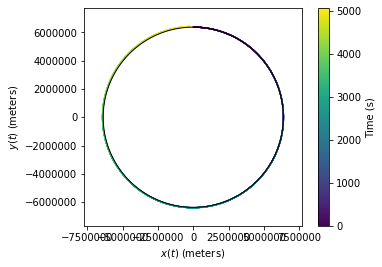

In [13]:
launch(vc, 0, P, aspect='equal')

Ta da! A perfect circle! Physics & math work!

Or do they...? Let's zoom in to a region +/-500km around the launch site of our projectile. What we expect to see is the projectile coming back exactly to its starting position after $t=P$. Let's see (and we'll turn off plotting of the Earth's surface, for clarity):

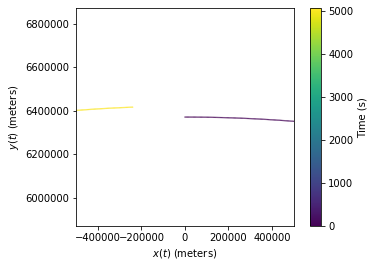

In [14]:
launch(vc, 0, P, aspect='equal', xrange=(-500_000, 500_000), yrange=(Re-500_000, Re+500_000), plot_earth=False)

What's going on here? We must always keep in mind that our numerical solution is just an _approximation_ of the ideal, correct, solution (remember how we replace the infinitesimal intervals $dt$ with $\Delta t$?). This will generally introduce some errors, and that is what we're seeing here.

How can we battle against it? Let's make the approximation better -- use a lower `dt` (which in the case of the `launch` function is computed from `nsteps` as `dt = T/nsteps`). So let's raise `nsteps` to something much larger and see if we can get the orbit to close on itself:

CPU times: user 1.77 s, sys: 23 ms, total: 1.8 s
Wall time: 1.8 s


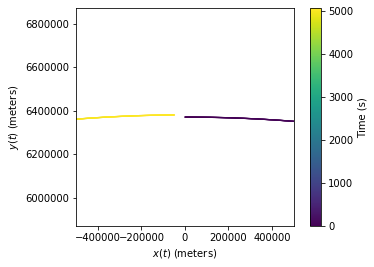

In [15]:
%%time
launch(vc, 0, P, aspect='equal', xrange=(-500_000, 500_000), yrange=(Re-500_000, Re+500_000), plot_earth=False, nsteps=50_000)

Let's raise it by another 10x:

CPU times: user 19.3 s, sys: 639 ms, total: 20 s
Wall time: 20 s


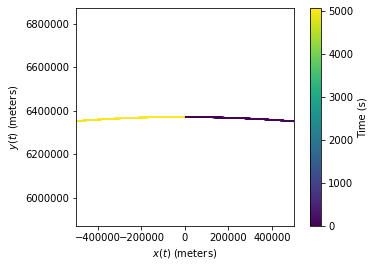

In [16]:
%%time
launch(vc, 0, P, aspect='equal', xrange=(-500_000, 500_000), yrange=(Re-500_000, Re+500_000), plot_earth=False, nsteps=500_000)

Even better! But note how long it took the computer to calculate all this -- nearly 20 seconds (for my computer, at least). That's a lot!

We're again seeing the old addage about there not being such a thing as a free lunch -- more precision with the same algorithm (Euler's method, in our case) generally requires more computation. As we mentioned before, an alternative is to come up with better approximative numerical integration algorithms; something we'll deal with later.

## A three-dimensional case

Now we have all the tooling we need to handle a fully three-dimensional case. It's really no different than the 2D case; we just add another pair of equations.

Let's do so for the ballistic projectile above. Our differential equations of motion will be:

$$ \dot x = v_x $$

$$ \dot v_x = -\gamma \cdot v^2 \cdot \frac{v_x}{\sqrt{v_x^2 + v_y^2}} $$

$$ \dot y = v_y $$

$$ \dot v_y = -\gamma \cdot v^2 \cdot \frac{v_y}{\sqrt{v_x^2 + v_y^2}} $$

$$ \dot z = v_z $$

$$ \dot v_z = -g -\gamma \cdot v^2 \cdot \frac{v_z}{v} $$


(where we've made gravity act in the $\hat{z}$ direction, as is the custom in physics). The fractions in expressions for $v$ give us the components of the unit vector $\hat{v}$.

We have to modify our code to handle the third dimension, but the modification is very simple:

In [17]:
def integrate(x_dot, vx_dot, y_dot, vy_dot, z_dot, vz_dot, tbegin, tend, x0, vx0, y0, vy0, z0, vz0, dt):
    # set up initial conditions
    t = tbegin
    x, vx = x0, vx0
    y, vy = y0, vy0
    z, vz = z0, vz0

    xval, vxval = [], []
    yval, vyval = [], []
    zval, vzval = [], []
    tval = []
    while t < tend - dt/2.:  # why did I do this? Ask me about numerical (im)precision...!
        tval.append(t)
        xval.append(x)
        vxval.append(vx)
        yval.append(y)
        vyval.append(vy)
        zval.append(z)
        vzval.append(vz)

        xnew  =  x +  x_dot(x, y, z, vx, vy, vz, t) * dt
        vxnew = vx + vx_dot(x, y, z, vx, vy, vz, t) * dt
        ynew  =  y +  y_dot(x, y, z, vx, vy, vz, t) * dt
        vynew = vy + vy_dot(x, y, z, vx, vy, vz, t) * dt
        znew  =  z +  z_dot(x, y, z, vx, vy, vz, t) * dt
        vznew = vz + vz_dot(x, y, z, vx, vy, vz, t) * dt
        
        x, vx = xnew, vxnew
        y, vy = ynew, vynew
        z, vz = znew, vznew
        t = t + dt

    return (tval, xval, vxval, yval, vyval, zval, vzval)

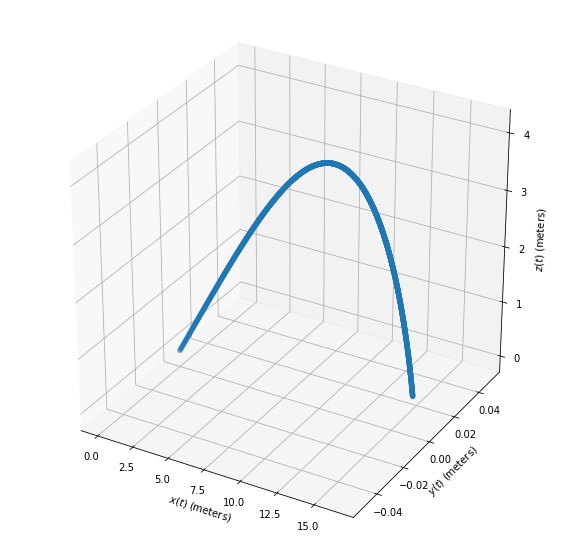

In [18]:
def x_dot(x, y, z, vx, vy, vz, t):
    return vx

def vx_dot(x, y, z, vx, vy, vz, t):
    v = np.sqrt(vx**2 + vy**2 + vz**2)
    vxy = np.sqrt(vx**2 + vy**2)
    a_drag = -gamma*v**2
    return a_drag * vx/vxy

def y_dot(x, y, z, vx, vy, vz, t):
    return vy

def vy_dot(x, y, z, vx, vy, vz, t):
    v = np.sqrt(vx**2 + vy**2 + vz**2)
    vxy = np.sqrt(vx**2 + vy**2)
    a_drag = -gamma*v**2
    return a_drag * vy/vxy

def z_dot(x, y, z, vx, vy, vz, t):
    return vz

def vz_dot(x, y, z, vx, vy, vz, t):
    v = np.sqrt(vx**2 + vy**2)
    a_drag = -gamma*v**2
    return -g + a_drag * vz/v

g = 9.81
gamma = 0.1
tbegin, tend = 0, 1.7
x0, vx0 = 0, 30
y0, vy0 = 0, 0
z0, vz0 = 0, 15
dt = 0.001

# enable 3D plotting
from mpl_toolkits.mplot3d import Axes3D

(tval, xval, vxval, yval, vyval, zval, vzval) = integrate(x_dot, vx_dot, y_dot, vy_dot, z_dot, vz_dot, tbegin, tend, x0, vx0, y0, vy0, z0, vz0, dt)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

ax.scatter(xval, yval, zval)
ax.set_xlabel("$x(t)$ (meters)")
ax.set_ylabel("$y(t)$ (meters)")
ax.set_zlabel("$z(t)$ (meters)");

Perhaps the most difficult part is visualizing the 3D trajectory. Let's use matplotlib's scatter plot with some ipywidgets magic:

In [19]:
g = 9.81
gamma = 0.1
tbegin, tend = 0, 1.7
x0, vx0 = 0, 30
y0, vy0 = 0, 0
z0, vz0 = 0, 15
dt = 0.001

def do_plot(elev=45, azim=45):
    # enable 3D plotting
    from mpl_toolkits.mplot3d import Axes3D

    (tval, xval, vxval, yval, vyval, zval, vzval) = integrate(x_dot, vx_dot, y_dot, vy_dot, z_dot, vz_dot, tbegin, tend, x0, vx0, y0, vy0, z0, vz0, dt)

    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(projection='3d')

    ax.scatter(xval, yval, zval)
    ax.set_xlabel("$x(t)$ (meters)")
    ax.set_ylabel("$y(t)$ (meters)")
    ax.set_zlabel("$z(t)$ (meters)")
    ax.view_init(elev, azim);

from ipywidgets import interact
interact(do_plot, elev=(-90, 90, 5), azim=(-180, 180, 10));

interactive(children=(IntSlider(value=45, description='elev', max=90, min=-90, step=5), IntSlider(value=45, de…

Exercises:
1. Change the initial conditions above, and observe how the trajectory changes. Specifically, launch your projectile at a 45-deg angle in the (x, y) plane (i.e., set $v_{x0} = v_{y0}$)
2. Look into installing plotly, and use its' 3D viewing tools: https://plotly.com/python/3d-scatter-plots/ . They should be better (faster, more responsive) than matplotlib+interact solution above.

Another way of visualizing is to plot 2D cross-sections:

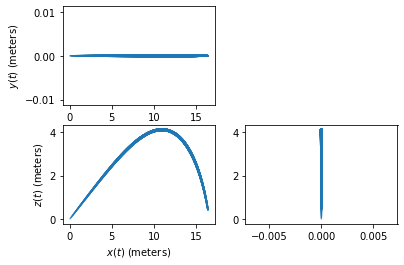

In [20]:
(tval, xval, vxval, yval, vyval, zval, vzval) = integrate(x_dot, vx_dot, y_dot, vy_dot, z_dot, vz_dot, tbegin, tend, x0, vx0, y0, vy0, z0, vz0, dt)

fig, ax = plt.subplots(2, 2)

ax[1, 0].scatter(xval, zval, zval)
ax[1, 0].set_ylabel("$z(t)$ (meters)")
ax[1, 0].set_xlabel("$x(t)$ (meters)")
ax[0, 0].scatter(xval, yval, zval)
ax[0, 0].set_ylabel("$y(t)$ (meters)")
ax[1, 1].scatter(yval, zval, zval)
ax[0, 1].set_xlabel("$y(t)$ (meters)")

fig.delaxes(ax[0, 1])

## Summary

In this section, we've learned how to solve differential equations in more than one dimension. We've used this knowledge to solve a set of more and more complex problems, until we've finally launched a projectile into orbit.

This is getting tantalizingly close to being able to compute orbits of bodies moving through the Solar System!

Exercises:
1. Rather than orbiting the Earth, see how a body revolves around the Sun, starting at a distance of 1 [astronomical unit](https://en.wikipedia.org/wiki/Astronomical_unit). Compute the circular velocity for such a body, and show it takes 1 year to make a full circle.
2. Then see what happens if you launch such a body with half of its $v_c$, or with $1.2 \cdot v_c$. What shapes do you get? And what are the perihelion and aphelion distances for these two (the closest and farthest points from the Sun)? Compute these numerically (modify `launch` to record the min/max distance from the origin).